In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
dfn= pd.read_csv("dataset//dataset_sdn_normal.csv")
print(dfn.head())
print(dfn.info())

      dt  switch        src        dst  pktcount  bytecount  dur   dur_nsec  \
0  11425       1  167772161  167772168     45304   48294064  100  716000000   
1  11605       1  167772161  167772168    126395  134737070  280  734000000   
2  11425       1  167772162  167772168     90333   96294978  200  744000000   
3  11425       1  167772162  167772168     90333   96294978  200  744000000   
4  11425       1  167772162  167772168     90333   96294978  200  744000000   

        tot_dur  flows  ...  Protocol  port_no   tx_bytes  rx_bytes  tx_kbps  \
0  1.010000e+11      3  ...         1        3  143928631      3917        0   
1  2.810000e+11      2  ...         1        4       3842      3520        0   
2  2.010000e+11      3  ...         1        1       3795      1242        0   
3  2.010000e+11      3  ...         1        2       3688      1492        0   
4  2.010000e+11      3  ...         1        3       3413      3665        0   

   rx_kbps  A1  A2  tot_kbps  label  
0     

In [3]:
dfa= pd.read_csv("dataset//dataset_sdn_Attack.csv")
print(dfa.head())
print(dfa.info())

      dt  switch        src        dst  pktcount  bytecount  dur   dur_nsec  \
0  11335       1  167772161  167772168      4777    5092282   10  711000000   
1  11335       1  167772161  167772168      4777    5092282   10  711000000   
2  11335       1  167772161  167772168      4777    5092282   10  711000000   
3  11335       1  167772161  167772168      4777    5092282   10  711000000   
4  11335       1  167772161  167772168      4777    5092282   10  711000000   

        tot_dur  flows  ...  Protocol  port_no  tx_bytes  rx_bytes  tx_kbps  \
0  1.071100e+10      3  ...         1        2      3753      1332        0   
1  1.071100e+10      3  ...         1        3      3679  58460931        0   
2  1.071100e+10      3  ...         1        2      3733      1402        0   
3  1.071100e+10      3  ...         1        4  58460931      3749     5232   
4  1.071100e+10      3  ...         1        3      3413      3623        0   

   rx_kbps  A1  A2  tot_kbps  label  
0      0.0  

In [4]:
l=[dfn,dfa]
df=pd.concat(l)

In [ ]:
df.corr()

In [7]:
#normalization
df=(df-df.min())/(df.max()-df.min())
# df.replace([np.inf, -np.inf], np.nan, inplace=True)
# df.dropna()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104345 entries, 0 to 40783
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  float64
 1   switch       104345 non-null  float64
 2   src          104345 non-null  float64
 3   dst          104345 non-null  float64
 4   pktcount     104345 non-null  float64
 5   bytecount    104345 non-null  float64
 6   dur          104345 non-null  float64
 7   dur_nsec     104345 non-null  float64
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  float64
 10  packetins    104345 non-null  float64
 11  pktperflow   104345 non-null  float64
 12  byteperflow  104345 non-null  float64
 13  pktrate      104345 non-null  float64
 14  Pairflow     104345 non-null  float64
 15  Protocol     104345 non-null  float64
 16  port_no      104345 non-null  float64
 17  tx_bytes     104345 non-null  float64
 18  rx_bytes     104345 non-n

In [9]:
df = df.drop(columns=['A1', 'A2'])
df = df[df['tot_kbps'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103839 entries, 0 to 40783
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           103839 non-null  float64
 1   switch       103839 non-null  float64
 2   src          103839 non-null  float64
 3   dst          103839 non-null  float64
 4   pktcount     103839 non-null  float64
 5   bytecount    103839 non-null  float64
 6   dur          103839 non-null  float64
 7   dur_nsec     103839 non-null  float64
 8   tot_dur      103839 non-null  float64
 9   flows        103839 non-null  float64
 10  packetins    103839 non-null  float64
 11  pktperflow   103839 non-null  float64
 12  byteperflow  103839 non-null  float64
 13  pktrate      103839 non-null  float64
 14  Pairflow     103839 non-null  float64
 15  Protocol     103839 non-null  float64
 16  port_no      103839 non-null  float64
 17  tx_bytes     103839 non-null  float64
 18  rx_bytes     103839 non-n

In [10]:
X=df.iloc[:,0:22]
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [11]:
for i in range(22):
    print(X.iloc[:,i].corr(y))

-0.10879802982906171
0.027643628634436625
0.1642021198726592
-0.03427149929246518
0.4032170310273026
0.278050718492917
-0.09873445396172899
0.029161413216110082
-0.09874533234390727
-0.18150995330738584
-0.0024886004473360897
0.08960828152895842
-0.014159589291034568
0.08980132785119854
-0.04747387867862384
-0.2726829872680563
-0.002759320314590729
-0.049301944287215065
-0.056577523976418645
-0.00564609672950631
-0.006713938893022832
-0.008747880485631347


RANDOM FOREST

In [13]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
ypred=rf.predict(X_test)
print("RANDOM FOREST")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))

RANDOM FOREST
Confusion matrix:
 [[19003     0]
 [    0 12149]]
Accuracy:  1.0


DECISION TREE

In [15]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

[Text(0.34446674311926606, 0.9705882352941176, 'bytecount <= 0.001\ngini = 0.476\nsamples = 72687\nvalue = [44332, 28355]'),
 Text(0.15022935779816513, 0.9117647058823529, 'Protocol <= 0.556\ngini = 0.018\nsamples = 22457\nvalue = [22248, 209]'),
 Text(0.13188073394495411, 0.8529411764705882, 'packetins <= 0.036\ngini = 0.384\nsamples = 282\nvalue = [73, 209]'),
 Text(0.11353211009174312, 0.7941176470588235, 'gini = 0.0\nsamples = 65\nvalue = [65, 0]'),
 Text(0.15022935779816513, 0.7941176470588235, 'packetins <= 0.701\ngini = 0.071\nsamples = 217\nvalue = [8, 209]'),
 Text(0.13188073394495411, 0.7352941176470589, 'gini = 0.0\nsamples = 209\nvalue = [0, 209]'),
 Text(0.16857798165137614, 0.7352941176470589, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.16857798165137614, 0.8529411764705882, 'gini = 0.0\nsamples = 22175\nvalue = [22175, 0]'),
 Text(0.538704128440367, 0.9117647058823529, 'byteperflow <= 0.993\ngini = 0.493\nsamples = 50230\nvalue = [22084, 28146]'),
 Text(0.5203555

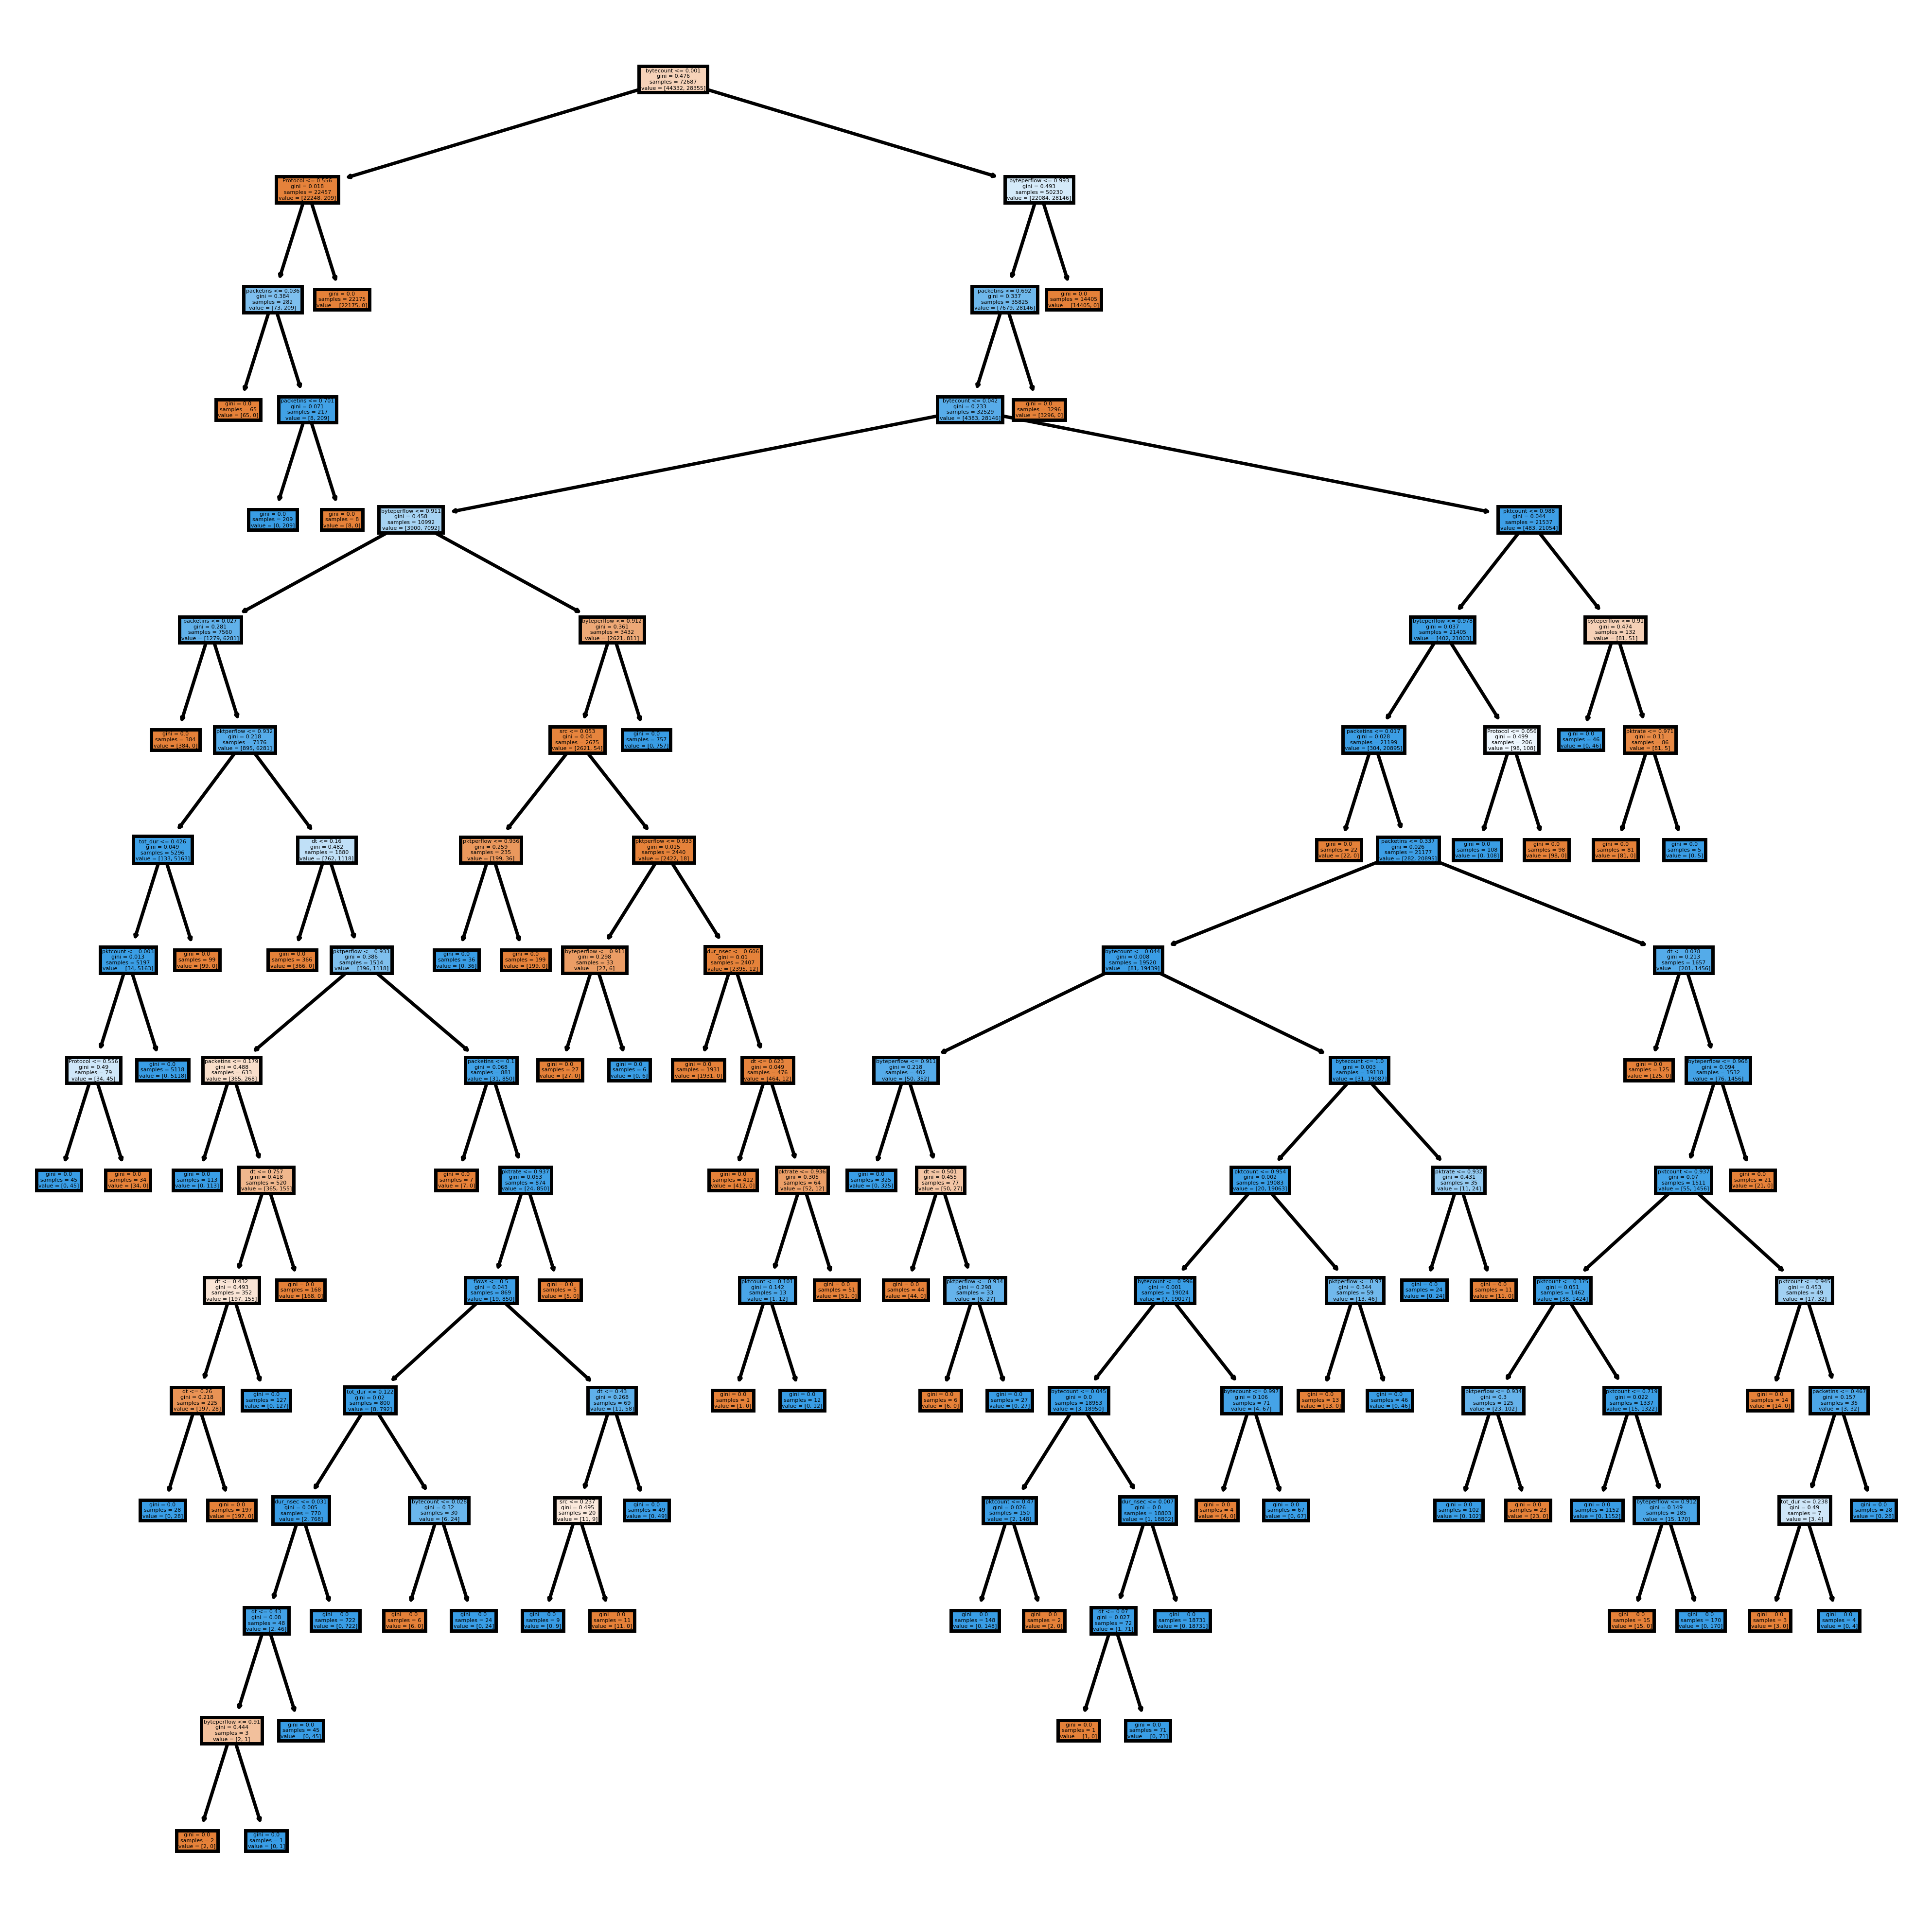

In [16]:
plt.rcParams['figure.dpi'] = 500
fig = plt.figure(figsize=(10,10))
tree.plot_tree(dt,feature_names=X.columns,filled=True)

In [17]:
ypred=dt.predict(X_test)
print("DECISION TREE")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))

DECISION TREE
Confusion matrix:
 [[19003     0]
 [    3 12146]]
Accuracy:  0.9999036979969184


In [18]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train,y_train)

SVC()

In [19]:
ypred=sv.predict(X_test)
print("SVM")
print("Confusion matrix:\n",confusion_matrix(y_test,ypred))
print("Accuracy: ",accuracy_score(y_test,ypred))

SVM
Confusion matrix:
 [[18137   866]
 [  329 11820]]
Accuracy:  0.9616397021058039
